# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Для начала работы импортируем необходимые библиотеки и откроем датасет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')   

Выведем для первые 10 строчек датафрейма.

In [3]:
data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные отражаются некорректно. Столбцы "слиплись". Применим параметр `sep`, для приведения таблицы к корректному виду.

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')     

Выведем первые 20 строчек датасета.

In [5]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


_Отобразим оставшиеся столбцы датафрейма_

In [6]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем основную информацию о датасете с помощью метода **`info()`**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

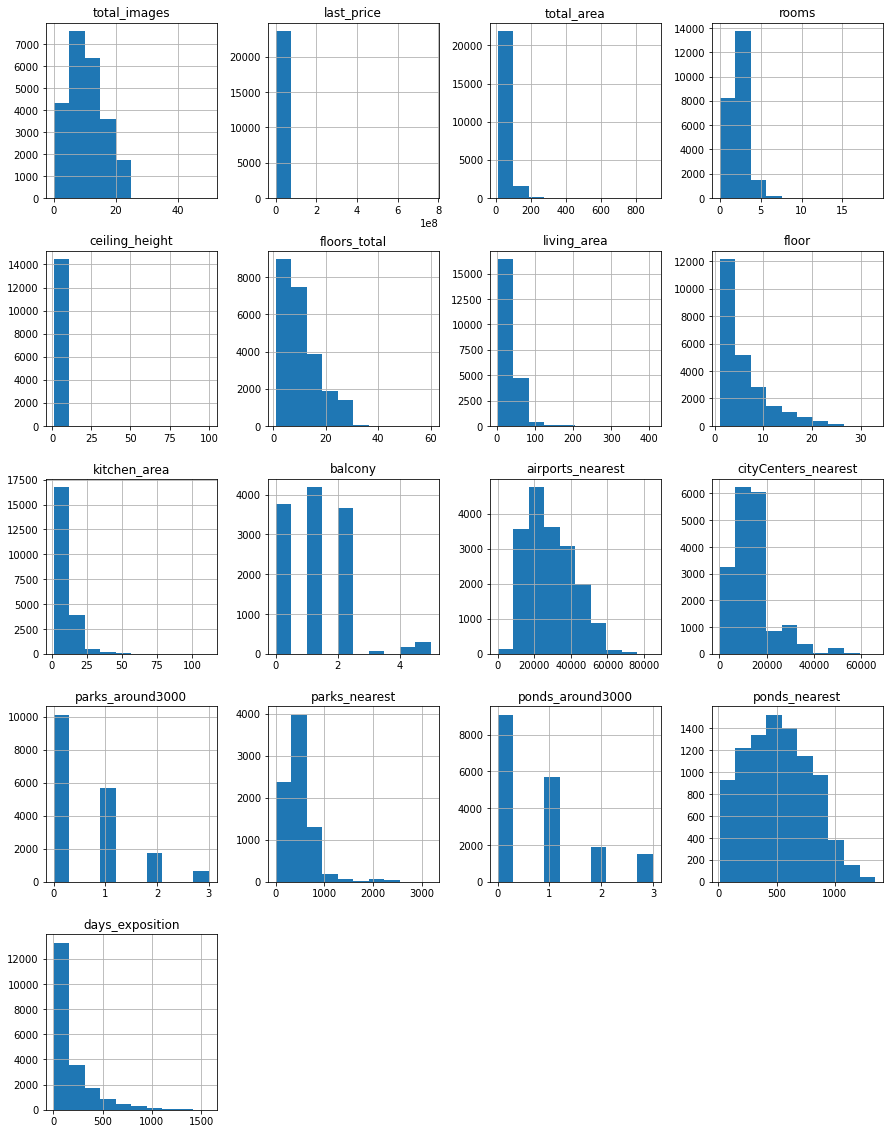

In [8]:
data.hist(figsize=(15, 20))

**Выводы:** 
1. Столбцы, которые содержат числа с плавающей точкой, удобно будет заменить на целочисленный тип данных. Исключение - столбец "ceiling_height". 
2. Столбец "first_day_exposition", отражающий дату и врмя, представлен строковым типом данных. Лучшим решением здесь будет привести его к типу datetime.
3. Значения столбцов с булевым типом данных нуждаются в преобразовании (0 - False, 1 - True) для удобства в дальнейших манипуляциях.

### Предобработка данных

Посчитаем количество пропущенных значений в данных.

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод:**
1. В "balcony", "parks_around3000", "ponds_around3000" отсутствующие значения можно смело заменить на 0, так как отсутствие данных значений предполагает отсутствие таких объектов поблизости в действиительности.
2. В "living_area" и "kitchen_area" пустые значения можно заменить на 0, так как они являются не совсем "самостоятельными" и составляют часть значения в "total_area". 

**Причин появлений пропусков в данных несколько:**
1. Некоторые значения не введены лично пользователями.
2. Возможно, значения в столбцах, отражающих расстояния до каких-либо объектов, остаются в датасете в случае включенной геолокации. Т.е. когда пользователь заполняет объявление о продаже и начинает заполнять поле, где указывают расстояния до ближайших объектов, сайт предлагает включить геолокацию. Не у всех пользователей есть возможность воспользоваться ей на момент заполнения объявления.
3. Пропуски в столбцах с булевым типом данных возникли в результате особенности сайта. Пользователь на момент заполнения данных в поле "балкон" может не оставить "след". В таком случае сайту просто-напросто нечего будет отправить о балконах на сервер. 
4. На сайте многие поля необязательны для заполнения. Однако, сайт незаполненные поля "вынужден" вернуть на сервер. А так как значений нет, то в датасете мы видим "nan".

Посчитаем количество строк-дубликатов в датасете.

In [10]:
data.duplicated().sum()

0

Получим набор уникальных значений столбцов, в которых встречаются пропущенные значения. По возможности сразу их исправим. Начнем по порядку.

In [11]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Встречаются аномальные значения для высоты потолков: `"32", "27", "24", "26", "14", "20", "22.6"` и `"100"`. Очевидно, они должны быть вещественными. Такие значения как `"8", "10"` вероятны, и их можно оставить без изменения. Скорее всего, это двухэтажные квартиры. Выбиваются из массива следующие значения `"1"` и `"1.2"`. Проверим, сильно ли эти значения портят "картину".

In [12]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Данные, несмотря на выбросы, корректны, поэтому пустые значения, можно заменить медианой.

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [14]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')
data['locality_name'] = data['locality_name'].astype('str')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [17]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'].nunique()

331

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбцах пустые значения заменим на 0. Конечно, это будут выбросы, но они не многочисленны.

Переведем столбцы в целичсленный тип данных, а пустые значения заменим на 0.

In [19]:
data['last_price'] = data['last_price'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [20]:
data['total_area'] = data['total_area'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [21]:
data['total_area'].sort_values().unique()

array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [22]:
data.loc[data['total_area'] == 631]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000,631,2019-03-30,7,2.65,5.0,NaN,5,NaN,False,False,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000,631,2019-04-09,7,3.90,4.0,322.3,4,NaN,False,False,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN


In [23]:
data.loc[data['total_area'] == 270]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18848,6,28500000,270,2015-03-02,16,3.0,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0


In [24]:
data[data['total_area'] == data['total_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900,2017-12-06,12,2.8,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Несмотря на наличие аномально больших площадей, удалять их из датафрейма не имеет смысла. Отразив строки таблицы, в которых содержатся данные значения, можно заметить, что другие значения заполнены адекватно. Помещение площадью 900 кв. м не похоже на ошибку. Вполне возможно, что это пентхаус. Однако будет лучше эти данные срезать. 

In [25]:
#только 0.005 датафрейма имеют значение выше 248,5
data['total_area'].quantile(0.995)

248.5099999999984

In [26]:
data = data.query('total_area < 249')

In [27]:
data['total_area'].sort_values().unique()

array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [28]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [29]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14])

При помощи метода query срезали аномальные значения в столбцах 'total_area', а вместе с ним ушли и аномалии в 'rooms'.
Одновременно скорректировлись данные в 'last_price'

In [30]:
data['is_apartment'] = data['is_apartment'].where(data['is_apartment'] == True, '1')
data['is_apartment'] = data['is_apartment'].where(data['is_apartment'] == False, '0')
data['is_apartment'] = data['is_apartment'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,0,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,0,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,0,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [31]:
data['open_plan'] = data['open_plan'].where(data['open_plan'] == True, '1')
data['open_plan'] = data['open_plan'].where(data['open_plan'] == False, '0')
data['open_plan'] = data['open_plan'].astype('int')
data.head()                

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,0,False,0,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,0,False,0,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,0,False,0,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,0,False,0,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,0,False,0,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [32]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].astype('int')
data.head()     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,0,False,0,25,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,0,False,0,11,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,0,False,0,8,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,0,False,0,0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,0,False,0,41,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [33]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [34]:
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14,NaN,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [35]:
data['living_area'] = data['living_area'].fillna(0)
data['living_area'] = data['living_area'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [36]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1.0,48.0,121.0


In [37]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48.0,121.0


In [38]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,0,81.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0


In [39]:
#data['days_exposition'] = data['days_exposition'].fillna(0)
#data['days_exposition'] = data['days_exposition'].astype('int')
#data.head()

### Посчитайте и добавьте в таблицу новые столбцы

Цена квадатного метра.

In [40]:
data['price_q_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_q_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN,120370.370370
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,0,81.0,83750.000000
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0,92785.714286
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0,408176.100629
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0,100000.000000


День публикации объявления

In [41]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_q_meter,day_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN,120370.370370,3
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,0,81.0,83750.000000,1
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0,92785.714286,3
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0,408176.100629,4
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0,100000.000000,1


Месяц публикации объявления.

In [42]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_q_meter,day_exposition,month_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN,120370.370370,3,3
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,0,81.0,83750.000000,1,12
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0,92785.714286,3,8
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0,408176.100629,4,7
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0,100000.000000,1,6


Год публикации объявления.

In [43]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_q_meter,day_exposition,month_exposition,year_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN,120370.370370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,0,81.0,83750.000000,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0,92785.714286,3,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0,408176.100629,4,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0,100000.000000,1,6,2018


Категоризация данных по этажам.

In [44]:
def category_floors(row):
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == max_floor:
        return 'последний'
    else:
        return 'другой'
data['what_floor'] = data.apply(category_floors, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_q_meter,day_exposition,month_exposition,year_exposition,what_floor
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN,120370.370370,3,3,2019,другой
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,0,81.0,83750.000000,1,12,2018,первый
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0,92785.714286,3,8,2015,другой
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0,408176.100629,4,7,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0,100000.000000,1,6,2018,другой


Расстояние от центра в км.

In [45]:
#пустые значения заполненяем "100", т.к. значение "0" будет считаться центром города и испортит всю "картину"
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_km'] = data['cityCenters_km'].fillna(100)
data['cityCenters_km'] = data['cityCenters_km'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_q_meter,day_exposition,month_exposition,year_exposition,what_floor,cityCenters_km
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,False,0,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN,120370.370370,3,3,2019,другой,16
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,0,False,0,11,2,поселок Шушары,12817.0,18603.0,0.0,0,0,0,81.0,83750.000000,1,12,2018,первый,18
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,0,False,0,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0,92785.714286,3,8,2015,другой,13
3,0,64900000,159,2015-07-24,3,2.65,14,0,9,0,False,0,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0,408176.100629,4,7,2015,другой,6
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,False,0,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0,100000.000000,1,6,2018,другой,8


### Проведите исследовательский анализ данных

count    23580.000000
mean        58.703011
std         28.722807
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        248.000000
Name: total_area, dtype: float64

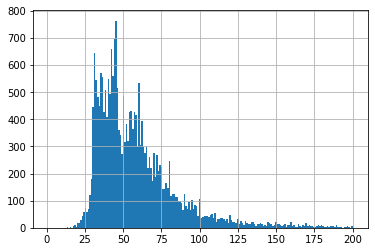

In [46]:
data['total_area'].hist(bins=200, range=(1,200))
data['total_area'].describe()

В основном, представлены квартиры менее 75 кв. м. Имеются и квартры большей площади, но их не так много.

count    23580.000000
mean        30.809245
std         20.216710
min          0.000000
25%         17.000000
50%         29.000000
75%         41.000000
max        220.000000
Name: living_area, dtype: float64

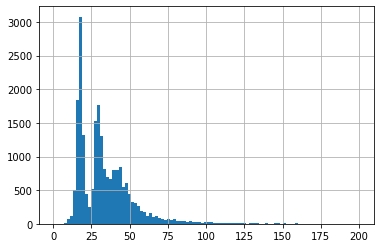

In [47]:
data['living_area'].hist(bins=100, range=(1,200))
data['living_area'].describe()

Распределение жилой площади неравномерно. Скорее всего, пики связаны с однокомнатными, двухкомнатными и трехкомнатными квартирами. 

count    23580.000000
mean         9.228880
std          6.049374
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         93.000000
Name: kitchen_area, dtype: float64

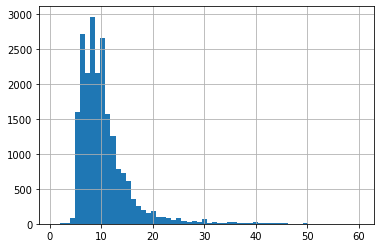

In [48]:
data['kitchen_area'].hist(bins=60, range=(1, 60))
data['kitchen_area'].describe()

В основном площадь кухни варьируется от 5 до 12 кв. м. 

count    23580.000000
mean         6.184064
std          7.024179
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

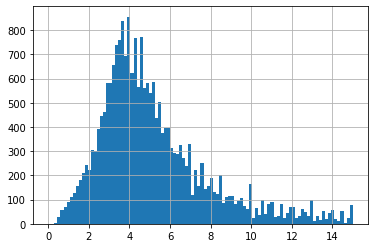

In [49]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].hist(bins=100, range=(0,15))
data['last_price'].describe()

Средняя цена квартиры - 5 млн. 

count    23580.000000
mean         2.050424
std          1.026124
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

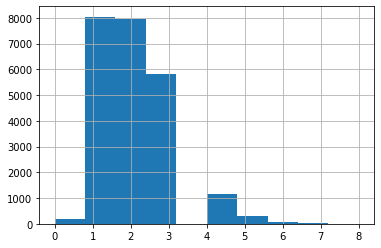

In [50]:
data['rooms'].hist(bins=10, range=(0,8))
data['rooms'].describe()

Основаная масса квартир однокомантные и двухкомнтаные, реже - трехкомнатные. Встречаются квартиры с 4 и более комнатами.

count      23580
unique         3
top       другой
freq       17380
Name: what_floor, dtype: object

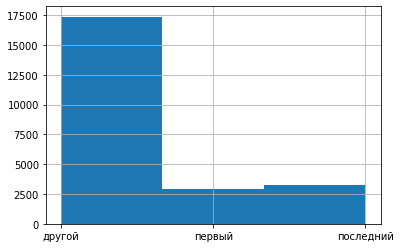

In [51]:
data['what_floor'].hist(bins=3, range=(0,2))
data['what_floor'].describe()

Как правило, львиная доля квартир находится не на первом и на последнем этажах.

count    23580.000000
mean        10.655089
std          6.620110
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

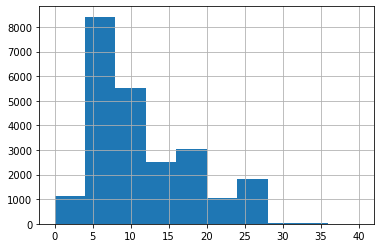

In [52]:
data['floors_total'].hist(bins=10, range=(0,40))
data['floors_total'].describe()

Квартиры, в основном, продаются в пятиэтажных и девятиэтажных домах. Стандартная этажность домов. Продаются квартры и в "высотках".

count    23580.000000
mean         5.894911
std          4.888717
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

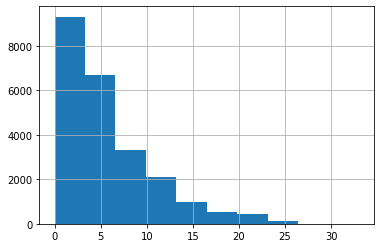

In [53]:
data['floor'].hist(bins=10, range=(0,33))
data['floor'].describe()

Расположены квартры в интервалах от второго и четвертого этажах. Менее большой интервал с пятого по десятый этажи.

count    18063.000000
mean     14236.794276
std       8604.921835
min        181.000000
25%       9321.500000
50%      13138.000000
75%      16316.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

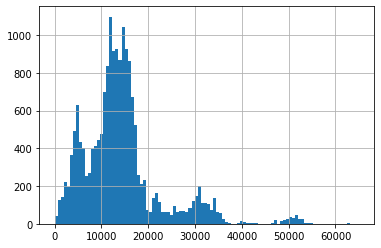

In [54]:
data['cityCenters_nearest'].hist(bins=100, range=(0,65000))
data['cityCenters_nearest'].describe()

Большая доля квартрир территориально располоена в 11-15 км от центра. 

count    23580.000000
mean       166.848007
std        306.464203
min          0.000000
25%          0.000000
50%          0.000000
75%        300.000000
max       3190.000000
Name: parks_nearest, dtype: float64

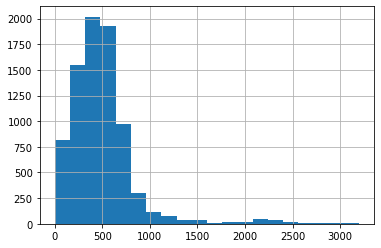

In [55]:
data['parks_nearest'].hist(bins=20, range=(1,3200))
data['parks_nearest'].describe()

Большинство квартир расположены на расстоянии менее 500 м от парка. 

count    23580.000000
mean       198.734394
std        305.294582
min          0.000000
25%          0.000000
50%          0.000000
75%        387.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

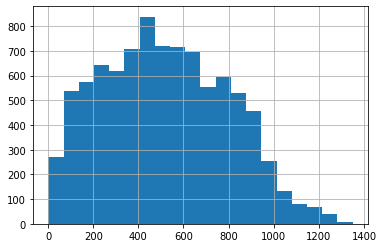

In [56]:
data['ponds_nearest'].hist(bins=20, range=(1,1350))
data['ponds_nearest'].describe()

Большая часть квартрир расположены на расстоянии менее 500 м от водоемов. 

count    23580.000000
mean         2.568405
std          1.789422
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exposition, dtype: float64

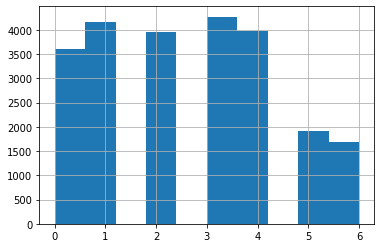

In [57]:
data['day_exposition'].hist()
data['day_exposition'].describe()

В выходные дни продаж квартир меньше. 

count    23580.000000
mean         6.400848
std          3.491158
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

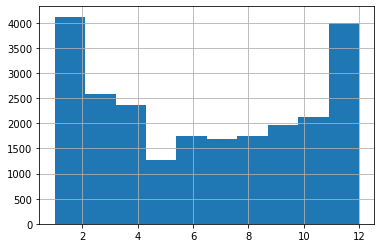

In [58]:
data['month_exposition'].hist()
data['month_exposition'].describe()

Снижение объемов продаж  квартир происходит в летние месяцы.

### Как быстро продавались квартиры?

count    20424.000000
mean       180.305229
std        219.059506
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

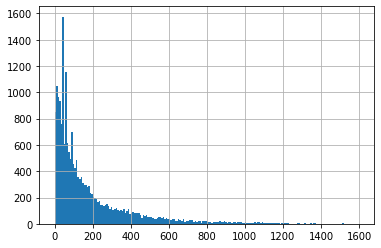

In [59]:
correct_data_days_exposition = data[data['days_exposition'] != 0] ['days_exposition']
correct_data_days_exposition.hist(bins = 200, range=(0,1600))
correct_data_days_exposition.describe()

Ни гистограмме присутствуют аномальные значения. Надо принять во внимание факт, что снятие объявления о продаже не означает, что квартира, действительно, была продана.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

,количество,среднее,медиана
total_area,,,
12,1,2.400000,2.400
13,4,2.184000,1.768
14,1,1.190000,1.190
15,3,1.966667,1.900
16,1,2.100000,2.100


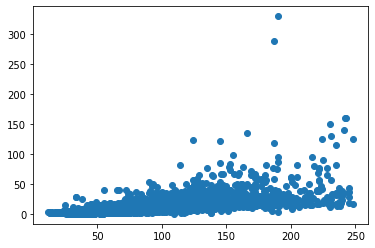

0.6690374478096186

In [60]:
pivot_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc = ['count', 'mean', 'median'])
pivot_total_area.columns = ['количество', 'среднее', 'медиана']
display(pivot_total_area.head())
plt.scatter(data['total_area'], data['last_price'])
plt.show()
data['total_area'].corr(data['last_price'])

Корреляция Пирсона равна 0.66. Взаимосвязь выше средней.

,количество,среднее,медиана
living_area,,,
0,1885,6.358873,4.5000
2,2,4.340000,4.3400
3,2,34.715000,34.7150
5,2,4.390000,4.3900
6,2,3.924500,3.9245


0.48530778459618346

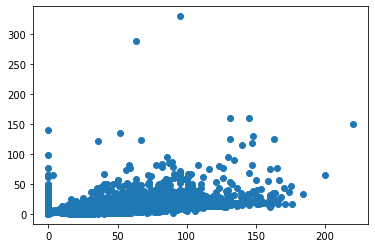

In [61]:
pivot_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc = ['count', 'mean', 'median'])
pivot_living_area.columns = ['количество', 'среднее', 'медиана']
display(pivot_living_area.head())
plt.scatter(data['living_area'], data['last_price'])
data['living_area'].corr(data['last_price'])

Зависимость общей стоимости от жилой площади средняя.

,количество,среднее,медиана
kitchen_area,,,
0,2260,54.009735,46.0
1,1,28.000000,28.0
2,10,28.300000,24.5
3,18,33.888889,28.0
4,76,38.131579,36.5


0.4379236660827757

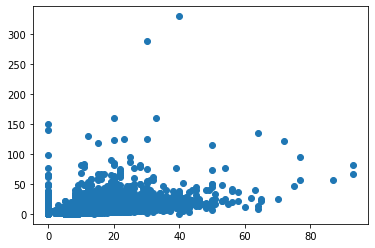

In [62]:
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values='total_area', aggfunc = ['count', 'mean', 'median'])
pivot_kitchen_area.columns = ['количество', 'среднее', 'медиана']
display(pivot_kitchen_area.head())
plt.scatter(data['kitchen_area'], data['last_price'])
data['kitchen_area'].corr(data['last_price'])

Корреляция 0.4 - ниже средней.

In [63]:
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc = ['count', 'mean', 'median'])
pivot_rooms.columns = ['количество', 'среднее', 'медиана']
display(pivot_rooms.head())
data['rooms'].corr(data['last_price'])

,количество,среднее,медиана
rooms,,,
0,196,2.992508,2.700000
1,8046,3.830471,3.600000
2,7940,5.591605,4.770169
3,5804,8.072344,6.200000
4,1168,12.756986,9.000000


0.3944782094421325

Корреляция почти такая же как у зависимости от площади кухни.

In [64]:
pivot_type_of_floor = data.pivot_table(index='what_floor', values='last_price', aggfunc = 'count')
pivot_type_of_floor.columns = ['количество']

display(pivot_type_of_floor.head())

,количество
what_floor,
другой,17380
первый,2908
последний,3292


,медиана
day_exposition,
0,4.63
1,4.70
2,4.70
3,4.60
4,4.55


<AxesSubplot:xlabel='day_exposition'>

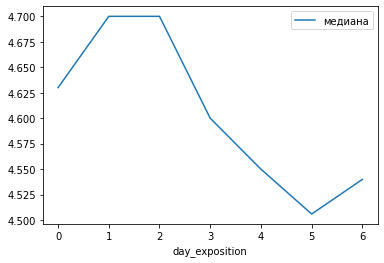

In [65]:
pivot_day_exposition = data.pivot_table(index='day_exposition', values='last_price', aggfunc = 'median')
pivot_day_exposition.columns = ['медиана']

display(pivot_day_exposition.head())
display(pivot_day_exposition.plot())
#data['day_exposition'].corr(data['last_price'])

Те квартиры, объявления о продаже которых опублиованы во вторник - дороже, а опубликованные в выходные - самые дешевые.

,медиана
month_exposition,
1,4.6000
2,4.6500
3,4.6500
4,4.7995
5,4.5000
6,4.4000
7,4.6000
8,4.5600
9,4.6850


<AxesSubplot:xlabel='month_exposition'>

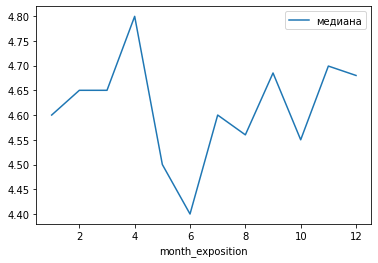

In [66]:
pivot_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc = 'median')
pivot_month.columns = ['медиана']

display(pivot_month.head(12))
display(pivot_month.plot())
#data['month_exposition'].corr(data['last_price'])

Квартиры, продающиеся с апреля - дороже. С июня - самые дешевые.

,медиана
year_exposition,
2014,7.58
2015,5.30
2016,4.50
2017,4.50
2018,4.55
2019,5.03


<AxesSubplot:xlabel='year_exposition'>

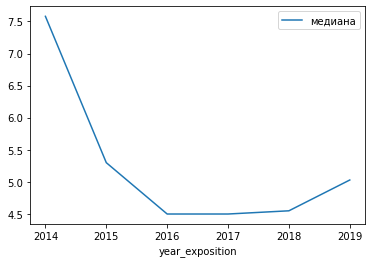

In [67]:
pivot_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc = 'median')
pivot_year.columns = ['медиана']

display(pivot_year.head(10))
display(pivot_year.plot())
#data['year_exposition'].corr(data['last_price'])

С 2014 года стоимость квартир планомерно снижается до 2018 года. Скорее всего это связано с "бумом" строительства нового жилья. Предложений продаж было большим.

**Вывод:** на стоимость квартиры больше всего оказывает общая площадь квартиры. Такой фактор как жилая площадь тоже оказывает влияние на стоимость квартры. В основном цены на квартиры высокие осенью и в будние дни. Низкие летом и в выходные дни.

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [68]:
top_10 = data.pivot_table(index='locality_name', values='price_q_meter', aggfunc=['count', 'mean'])
top_10.columns = ['количество объявлений', 'средняя цена за квадаратный метр']
top_10 = top_10.sort_values(by='количество объявлений', ascending=False)[1:11]

display(top_10)
display(top_10[top_10['средняя цена за квадаратный метр'] == top_10['средняя цена за квадаратный метр'].max()])
top_10[top_10['средняя цена за квадаратный метр'] == top_10['средняя цена за квадаратный метр'].min()]

,количество объявлений,средняя цена за квадаратный метр
locality_name,,
поселок Мурино,556,86312.033181
поселок Шушары,440,79068.602928
Всеволожск,398,68985.235455
Пушкин,367,103619.041292
Колпино,337,75644.775388
поселок Парголово,327,90675.627757
Гатчина,307,69045.519030
деревня Кудрово,299,93002.173472
Выборг,237,58296.119480


,количество объявлений,средняя цена за квадаратный метр
locality_name,,
Пушкин,367,103619.041292


,количество объявлений,средняя цена за квадаратный метр
locality_name,,
Выборг,237,58296.11948


Наибольшее количество объявлений вне Санкт-Петербурга было выложено из пос. Мурино. 

Самая высокая цена за кв. метр в г. Пушкин

Самая низкая - в г. Выборг

### Средняя цена каждого километра.

,price_q_meter
cityCenters_km,
0,181556.527565
1,166005.860733
2,144351.656607
3,124454.200494
4,135857.565210
5,145109.824751
6,150406.183019
7,139439.377743
8,121018.442996


<AxesSubplot:xlabel='cityCenters_km'>

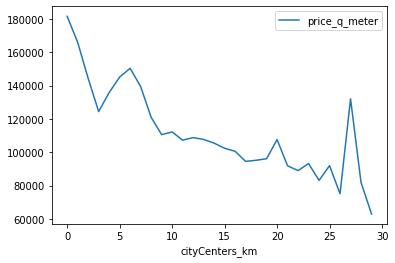

In [69]:
locality_name_st_Peterburg_pivot = (
    data
    .query('locality_name == "Санкт-Петербург" & cityCenters_km != 100')
    .pivot_table(index='cityCenters_km', values='price_q_meter', aggfunc='mean')
)
display(locality_name_st_Peterburg_pivot)
locality_name_st_Peterburg_pivot.plot()

**Вывод:** чем дальше от центра, тем ниже стоимость квадратного метра. Однако, после 3-4 км идет взлет цен. Скорее всего, речь идет о "престижных" районах, где на стоимость квадратного метра влияют другие факторы. Также на гистограмме фиксируется взлет цен в 25-27 км. В этом радиусе расположены пригороды. На их стоимость, скорее весго, влияют другие факторы, которые в датасете не зафиксированы.

### Общий вывод

В ходе анализа датасета были устранены аномальные значения и скорректированы пропуски. 
Выявленные закономерности отразили, что на стоимость квартиры наибольшее влияние оказывает общая площадь. Также на стоимость влияет жилая площадь. Такие факторы как количество комнат, этаж в доме, первый или последний этаж в доме существенного влияния на стоимость квартиры не оказывают. Из территориальных факторов, ключевым является только удаленность от центра.
Объявления о продаже висят в среднем 3 месяца. Иногда квартиры продаются в течение 1 дня. Длительной продажей можно считать продажу больше 7 месяцев.
Дороже квартиры продаются осенью и тогда, когда объявление о продаже выставлено во вторник. Дешевле квартиры стоят поздней весной и когда объявление о продаже оставлено в выходной день.
Кроме Санкт-Петербурга по количеству объявлений о продаже лидирует пос. Мурино. 
Самая большая цена за кв. метр в г. Пушкин, самая низкая - в г. Выборг.
Отмечена закономерность, что чем ближе квартра к центру, тем больше стоимость квадратного метра. Однако в границах 3-6 км и 26-27 км, стоимость вновь увеличивается. На это влияют другие факторы, которые в данных не отражены.